
# Introduction to Matplotlib and Line Plots 
    

## Objectives

After completing this lab you will be able to:

* Create Data Visualization with Python
* Use various Python libraries for visualization


## Table of Contents

<div class="alert alert-block alert-info" style="margin-top: 20px">

1. [The Dataset: Immigration to Canada from 1980 to 2013](#1)<br>
2. [Using the Matplotlib Visualization Library](#2) <br>
3. [Vizualization 1: Line Pots (Appliable for Series and Dataframe)](#3)<br>
4. [ Line Plots ](#4)
</div>


## The Dataset: Immigration to Canada from 1980 to 2013 <a id="1"></a>
Dataset Source: [International migration flows to and from selected countries - The 2015 revision](https://www.un.org/development/desa/pd/data/international-migration-flows).


In [43]:
import numpy as np  # useful for many scientific computing in Python
import pandas as pd # primary data structure library
df_can = pd.read_csv('https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DV0101EN-SkillsNetwork/Data%20Files/Canada.csv')
df_can.head()

,Country,Continent,Region,DevName,1980,1981,1982,1983,1984,1985,...,2005,2006,2007,2008,2009,2010,2011,2012,2013,Total
0,Afghanistan,Asia,Southern Asia,Developing regions,16,39,39,47,71,340,...,3436,3009,2652,2111,1746,1758,2203,2635,2004,58639
1,Albania,Europe,Southern Europe,Developed regions,1,0,0,0,0,0,...,1223,856,702,560,716,561,539,620,603,15699
2,Algeria,Africa,Northern Africa,Developing regions,80,67,71,69,63,44,...,3626,4807,3623,4005,5393,4752,4325,3774,4331,69439
3,American Samoa,Oceania,Polynesia,Developing regions,0,1,0,0,0,0,...,0,1,0,0,0,0,0,0,0,6
4,Andorra,Europe,Southern Europe,Developed regions,0,0,0,0,0,0,...,0,1,1,0,0,0,0,1,1,15


Let's set Country as the index, it will help you to plot the charts easily, by refering to the country names as index value

In [ ]:
df_can.set_index('Country', inplace=True)

In [38]:
df_can.head()

,Continent,Region,DevName,1980,1981,1982,1983,1984,1985,1986,...,2005,2006,2007,2008,2009,2010,2011,2012,2013,Total
Country,,,,,,,,,,,,,,,,,,,,,
Afghanistan,Asia,Southern Asia,Developing regions,16,39,39,47,71,340,496,...,3436,3009,2652,2111,1746,1758,2203,2635,2004,58639
Albania,Europe,Southern Europe,Developed regions,1,0,0,0,0,0,1,...,1223,856,702,560,716,561,539,620,603,15699
Algeria,Africa,Northern Africa,Developing regions,80,67,71,69,63,44,69,...,3626,4807,3623,4005,5393,4752,4325,3774,4331,69439
American Samoa,Oceania,Polynesia,Developing regions,0,1,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,6
Andorra,Europe,Southern Europe,Developed regions,0,0,0,0,0,0,2,...,0,1,1,0,0,0,0,1,1,15


Since we converted the years to string, let's declare a variable that will allow us to easily call upon the full range of years:

In [12]:
# useful for plotting later on
years = list(map(str, range(1980, 2014)))
years

['1980',
 '1981',
 '1982',
 '1983',
 '1984',
 '1985',
 '1986',
 '1987',
 '1988',
 '1989',
 '1990',
 '1991',
 '1992',
 '1993',
 '1994',
 '1995',
 '1996',
 '1997',
 '1998',
 '1999',
 '2000',
 '2001',
 '2002',
 '2003',
 '2004',
 '2005',
 '2006',
 '2007',
 '2008',
 '2009',
 '2010',
 '2011',
 '2012',
 '2013']

## Using the Matplotlib Visualization Library<a id="2"></a>

In [13]:
%matplotlib inline 

import matplotlib as mpl
import matplotlib.pyplot as plt

In [14]:
print('Matplotlib version: ', mpl.__version__)  # >= 2.0.0
print(plt.style.available)
mpl.style.use(['ggplot']) # optional: for ggplot-like style

Matplotlib version:  3.5.3
['Solarize_Light2', '_classic_test_patch', '_mpl-gallery', '_mpl-gallery-nogrid', 'bmh', 'classic', 'dark_background', 'fast', 'fivethirtyeight', 'ggplot', 'grayscale', 'seaborn', 'seaborn-bright', 'seaborn-colorblind', 'seaborn-dark', 'seaborn-dark-palette', 'seaborn-darkgrid', 'seaborn-deep', 'seaborn-muted', 'seaborn-notebook', 'seaborn-paper', 'seaborn-pastel', 'seaborn-poster', 'seaborn-talk', 'seaborn-ticks', 'seaborn-white', 'seaborn-whitegrid', 'tableau-colorblind10']


#### Plotting in *pandas*

Pandas has a built-in implementation of Matplotlib that we can use. Plotting in *pandas* is as simple as appending a `.plot()` method to a series or dataframe.

Documentation:
- [Plotting with Series](http://pandas.pydata.org/pandas-docs/stable/api.html#plotting)<br>
- [Plotting with Dataframes](http://pandas.pydata.org/pandas-docs/stable/api.html#api-dataframe-plotting)

## Vizualization 1: Line Pots (Appliable for Series and Dataframe)<a id="3"></a>

** Case study: Effects of The Montreal Moroccan diaspora, and the Canadian family sponsorship on the Moroccan immigration to canada at the begining of the 21st century :**
the largest wave of Moroccan immigrants moving to Canada was in the late 1990s, and since the year 2000, immigration from Morocco to Canada has continued to grow<a href="https://www.thecanadianencyclopedia.ca/en/article/moroccan-canadians">(1)</a>,<a href="https://www.visaplace.com/canadian-immigration/country/morocco/">(2)</a>. two combined reasons could explain these trends: The Montreal Moroccan diaspora and the use of family sponsorship by Moroccan immigrants.
The Montreal Moroccan diaspora has a rich history and is composed of both Jewish and Muslim communities. The Jewish Moroccan community in Montreal dates back to the period after the destruction of the Jewish state, with significant immigration occurring between 1957 and 1967 <a href="https://www.jstor.org/stable/48561453">(3)</a>.
On the other hand, the immigration of Moroccan Muslims to Montreal intensified towards the end of the 1990s, with many individuals facing socio-economic difficulties in Morocco and seeking opportunities in Quebec<a href="https://www.thecanadianencyclopedia.ca/fr/article/communaute-marocaine-au-canada">(4)</a>. the effects of the montreal moroccan diaspora was followed by the use of family sponsorship for moroccan families.
We can quickly visualize these trends this effort using a `Line` plot:

**Next, we plot a line graph of immigration from morocco using `df.plot()`**.


first we extract the data from morocco:

In [23]:
#Since we converted the years to string, 
#let's declare a variable that will allow us to easily call upon the full range of years:
years = list(map(str, range(1980, 2014)))
#creating data series
Morocco = df_can.loc['Morocco', years] # passing in years 1980 - 2013 to exclude the 'total' column
Morocco.tail()

2009    5532
2010    6242
2011    4399
2012    3878
2013    3261
Name: Morocco, dtype: object

<AxesSubplot:>

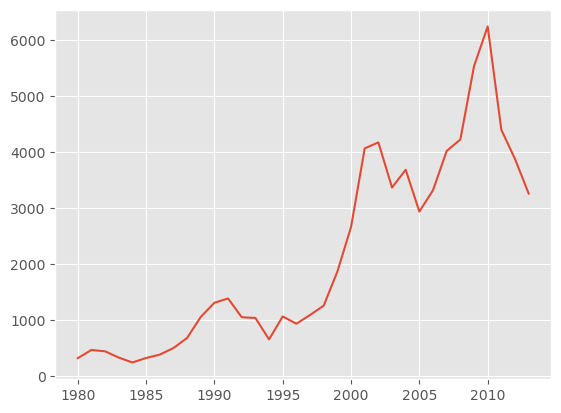

In [24]:
Morocco.plot()

*pandas* automatically populated the x-axis with the index values (years), and the y-axis with the column values (population). <br>

Also, let's label the x and y axis using `plt.title()`, `plt.ylabel()`, and `plt.xlabel()` as follows:

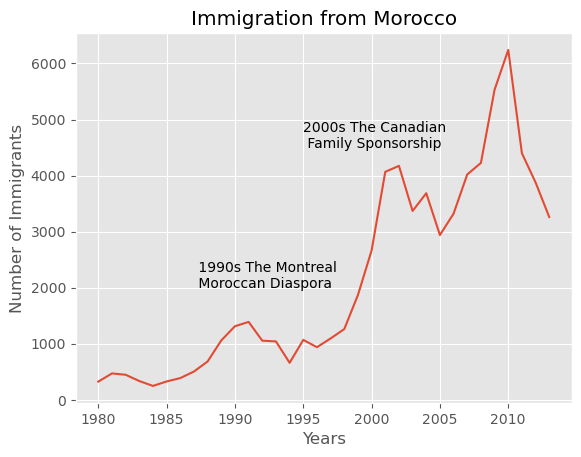

In [36]:
Morocco.index = Morocco.index.map(int) 
Morocco.plot(kind='line')

plt.title('Immigration from Morocco')
plt.ylabel('Number of Immigrants')
plt.xlabel('Years')

# annotate the 2010 Earthquake. 
# syntax: plt.text(x, y, label)
plt.text(1987, 2000, ' 1990s The Montreal \n Moroccan Diaspora') # see note below
plt.text(1995, 4500, '2000s The Canadian \n Family Sponsorship')
plt.show()  # need this line to show the updates made to the figure

## Line Plots <a id="4"></a>
**The next lines of code perform a comparison of the top 3 countries in the dataset that have contributed the most to immigration to Canada.**

Country  India  China  United Kingdom of Great Britain and Northern Ireland
1980      8880   5123                                              22045   
1981      8670   6682                                              24796   
1982      8147   3308                                              20620   
1983      7338   1863                                              10015   
1984      5704   1527                                              10170   
1985      4211   1816                                               9564   
1986      7150   1960                                               9470   
1987     10189   2643                                              21337   
1988     11522   2758                                              27359   
1989     10343   4323                                              23795   
1990     12041   8076                                              31668   
1991     13734  14255                                              23380   
1992     136

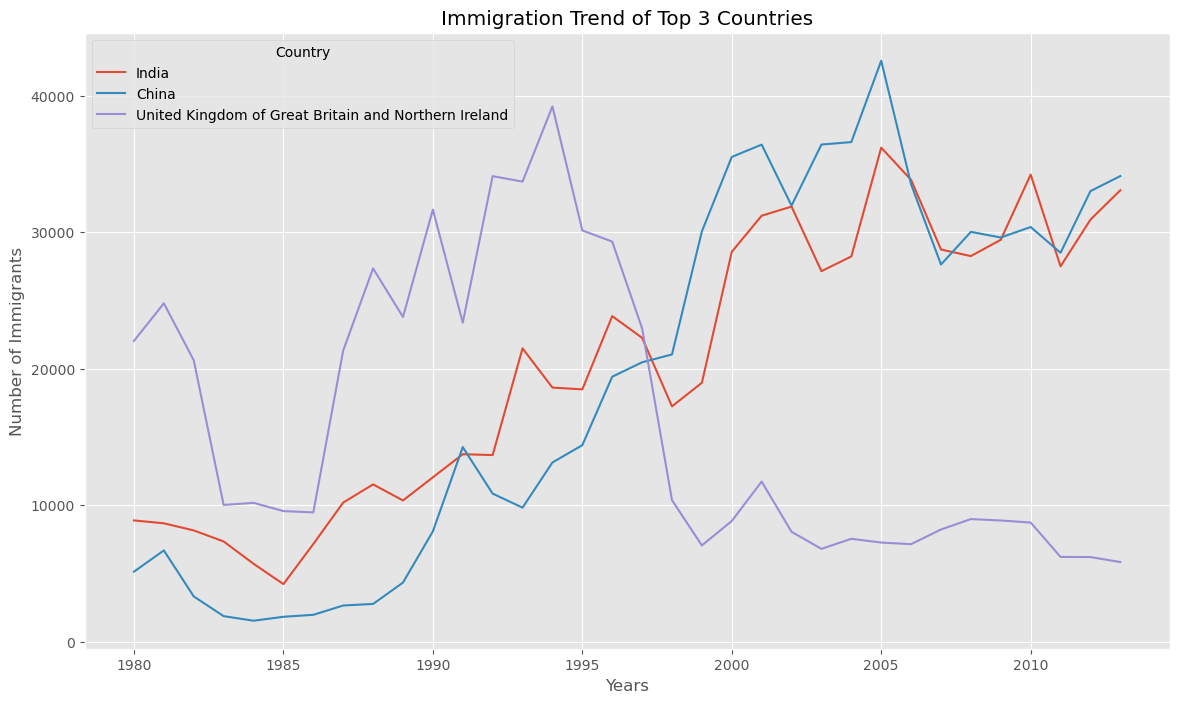

In [41]:
inplace = True # paramemter saves the changes to the original df_can dataframe
df_can.sort_values(by='Total', ascending=False, axis=0, inplace=True)

# get the top 5 entries
df_top3 = df_can.head(3)

# transpose the dataframe
df_top3 = df_top3[years].transpose() 
print(df_top3)
#Step 2: Plot the dataframe. To make the plot more readeable, we will change the size using the `figsize` parameter.
df_top3.index = df_top3.index.map(int) # let's change the index values of df_top3 to type integer for plotting
df_top3.plot(kind='line', figsize=(14, 8)) # pass a tuple (x, y) size
plt.title('Immigration Trend of Top 3 Countries')
plt.ylabel('Number of Immigrants')
plt.xlabel('Years')
plt.show()

## Author

<a href="https://www.linkedin.com/in/youness-el-amine-ba21a9197/" target="_blank">EL AMINE Youness</a>